In [1]:
%%capture
%pip install neqsim

#To check for methods in a Java object 
#from neqsim import methods

# Experimental data
Experimental data for density is collected.

In [2]:
import pandas as pd
expdata_df = pd.read_csv('../../../data/thermodynamics/density/water.csv')
expdata_df

,ID,StandardDeviation,Temperature,ComponentName,Density,Pressure,PhaseType,Reference
0,20,10,273.15,water,999.839,1.01325,liquid,Perry1998
1,21,10,274.15,water,999.898,1.01325,liquid,Perry1998
2,22,10,278.15,water,999.964,1.01325,liquid,Perry1998
3,23,10,283.15,water,999.699,1.01325,liquid,Perry1998
4,24,10,293.15,water,998.204,1.01325,liquid,Perry1998
5,25,10,303.15,water,995.647,1.01325,liquid,Perry1998
6,26,10,313.15,water,992.215,1.01325,liquid,Perry1998
7,27,10,323.15,water,988.037,1.01325,liquid,Perry1998
8,28,10,333.15,water,983.200,1.01325,liquid,Perry1998
9,29,10,343.15,water,977.771,1.01325,liquid,Perry1998


<Figure size 640x480 with 0 Axes>

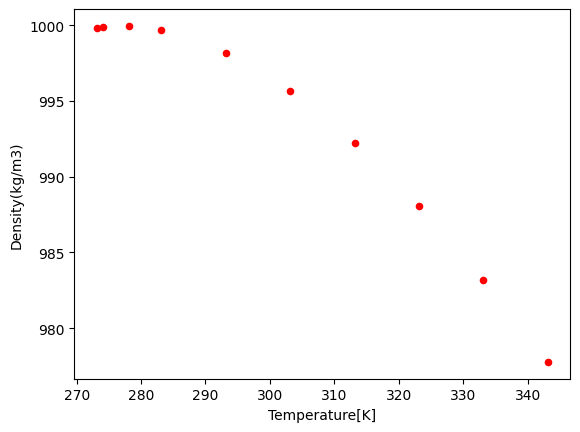

In [3]:
from matplotlib import pyplot as plt
fig = plt.figure()

expdata_df.plot(x='Temperature', y='Density', kind='scatter',ylabel='Density(kg/m3)', xlabel='Temperature[K]',color='red')

plt.show()

# Evaluation of experimental data

In this section the experimental data will be evaluated and eventual some data sets will be removed from the set.

# Compare to NeqSim Calculations

## NeqSim calculations at 288.15 K

<Figure size 640x480 with 0 Axes>

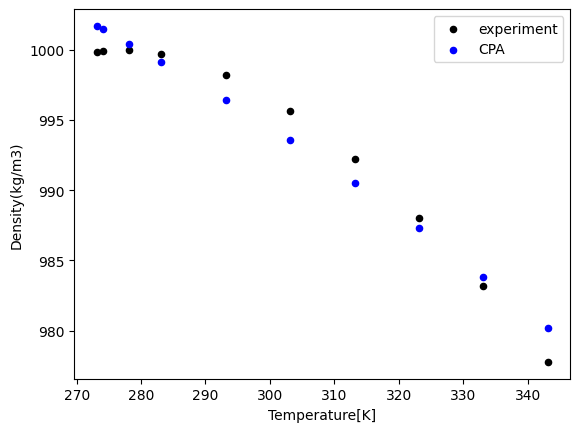

In [10]:
import neqsim
from neqsim.thermo.thermoTools import fluid, TPflash, fluidComposition,bubp
import pandas as pd
import numpy as np

fluid1 = fluid('cpa')
fluid1.addComponent('water', 1.0)
fluid1.setTemperature(15.0, 'C')
fluid1.setPressure(1.0, 'bara')

def density(temp):
    fluid1.setTemperature(temp, 'K')
    TPflash(fluid1)
    fluid1.initProperties()
    return fluid1.getPhase('aqueous').getDensity('kg/m3')

temperatures = expdata_df['Temperature'].values.tolist()
dens_res = [density(T) for T in temperatures]

dataWithExperiment = expdata_df.assign(dens_CPA = dens_res)

from matplotlib import pyplot as plt
fig = plt.figure()	
plot1 = dataWithExperiment.plot(x='Temperature', y='Density', kind='scatter',ylabel='Density(kg/m3)', xlabel='Temperature[K]',color='black')	
dataWithExperiment.plot(ax=plot1, x='Temperature', y='dens_CPA', kind='scatter',ylabel='Density(kg/m3)', xlabel='Temperature[K]',color='blue')	
plt.legend(['experiment', 'CPA'])
plt.show()

# Parameter fitting

## Manual fitting

Racket CPA  0.296941807
vol corr T_CPA  0.000718744
vol corr  -2.514719645431966e-07  m3/mol  cpa_org  1.7925978979054823e-05  ,3/mol
vol corr T  7.18744e-08  m3/mol


<Figure size 640x480 with 0 Axes>

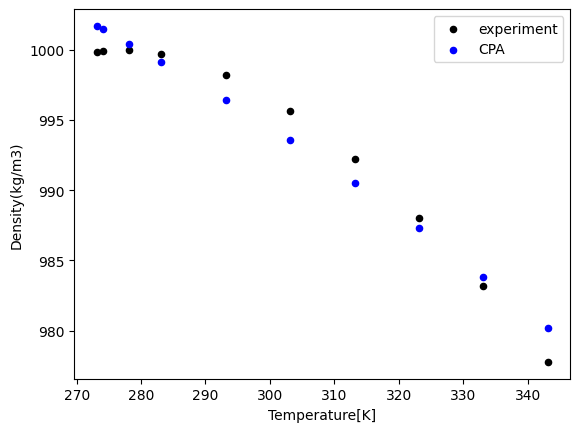

In [11]:
import neqsim
from neqsim.thermo.thermoTools import fluid, TPflash, fluidComposition,bubp
import pandas as pd
import numpy as np

fluid1 = fluid('cpa')
fluid1.addComponent('water', 1.0)
fluid1.setTemperature(25.0, 'C')
fluid1.setPressure(1.0, 'bara')
#fluid1.useVolumeCorrection(False)
print('Racket CPA ' , fluid1.getPhase(0).getComponent('water').getRacketZCPA())
print('vol corr T_CPA ' ,fluid1.getPhase(0).getComponent('water').getVolumeCorrectionT_CPA())
TPflash(fluid1)
#vol corr : 0.40768 * (0.29441 - this.getRacketZ()) * R * criticalTemperature / criticalPressure
volCorr = 0.40768 * (0.29441 - fluid1.getPhase(0).getComponent('water').getRacketZCPA()) * 8.314 * fluid1.getPhase(0).getComponent('water').getTC() / fluid1.getPhase(0).getComponent('water').getPC()
print('vol corr ', volCorr/1e5, ' m3/mol', ' cpa_org ', fluid1.getPhase(0).getMolarVolume()/1e5, ' ,3/mol')
#volcorrCPA = volCorr + vol corr T * (liquidPhase.getPhase().getTemperature() - 288.15)) # molvol = molvolCPA + volcorrCPA m3/mol
print('vol corr T ', fluid1.getPhase(0).getComponent('water').getVolumeCorrectionT_CPA()*(fluid1.getTemperature('K')-288.15)/1e5, ' m3/mol')

#for phase in range(2):
    #fluid1.getPhase(phase).getComponent('water').setRacketZCPA(0.284542458)
    #fluid1.getPhase(phase).getComponent('water').setVolumeCorrectionT_CPA(-0.004423613)

def density(temp):
    fluid1.setTemperature(temp, 'K')
    TPflash(fluid1)
    fluid1.initProperties()
    return fluid1.getPhase('aqueous').getDensity('kg/m3')

temperatures = expdata_df['Temperature'].values.tolist()
dens_res = [density(T) for T in temperatures]

dataWithExperiment = expdata_df.assign(dens_CPA = dens_res)

from matplotlib import pyplot as plt
fig = plt.figure()	
plot1 = dataWithExperiment.plot(x='Temperature', y='Density', kind='scatter',ylabel='Density(kg/m3)', xlabel='Temperature[K]',color='black')	
dataWithExperiment.plot(ax=plot1, x='Temperature', y='dens_CPA', kind='scatter',ylabel='Density(kg/m3)', xlabel='Temperature[K]',color='blue')	
plt.legend(['experiment', 'CPA'])
plt.show()

## Automatic fitting